<a href="https://colab.research.google.com/github/wawill14/Final-Project/blob/main/PFDAFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
# Upload necessary libraries 
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import statistics

In [110]:
# Upload csv from raw github url
df = pd.read_csv("https://raw.githubusercontent.com/wawill14/Final-Project/main/Chess%20Game%20Stats.csv",index_col=["game_id"])
df.head(25)

,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
game_id,,,,,,,,,,,,,,,,
1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN
6,False,5,Draw,Draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,4,Sicilian Defense: Mongoose Variation,Sicilian Defense,NaN,Mongoose Variation
7,True,33,Resign,White,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,10,Blackmar-Diemer Gambit: Pietrowsky Defense,Blackmar-Diemer Gambit,NaN,Pietrowsky Defense
8,False,9,Resign,Black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,5,Nimzowitsch Defense: Kennedy Variation | Link...,Nimzowitsch Defense,NaN,Kennedy Variation
9,True,66,Resign,Black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,6,Italian Game: Schilling-Kostic Gambit,Italian Game,NaN,Schilling-Kostic Gambit


In [111]:
# Drop columns for opening response, turns, time increment 
df.drop(["opening_response", "turns", "time_increment"],axis=1,inplace=True)

In [112]:
# Analysis of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20058 entries, 1 to 20058
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   victory_status     20058 non-null  object
 2   winner             20058 non-null  object
 3   white_id           20058 non-null  object
 4   white_rating       20058 non-null  int64 
 5   black_id           20058 non-null  object
 6   black_rating       20058 non-null  int64 
 7   moves              20058 non-null  object
 8   opening_code       20058 non-null  object
 9   opening_moves      20058 non-null  int64 
 10  opening_fullname   20058 non-null  object
 11  opening_shortname  20058 non-null  object
 12  opening_variation  14398 non-null  object
dtypes: bool(1), int64(3), object(9)
memory usage: 2.0+ MB


In [113]:
# Printing number of rows and columns 
print('Number of columns: {}'.format(df.shape[1]))
print('Number of rows: {}'.format(df.shape[0]))

Number of columns: 13
Number of rows: 20058


In [114]:
# Summary stats of quantitative variables  
stats_numeric = df.describe().astype(int)
print(stats_numeric)

       white_rating  black_rating  opening_moves
count         20058         20058          20058
mean           1596          1588              4
std             291           291              2
min             784           789              1
25%            1398          1391              3
50%            1567          1562              4
75%            1793          1784              6
max            2700          2723             28


In [115]:
# Summary stats of categorical variables 
stats_categorical = df[['opening_shortname','victory_status', 'rated']].describe()
print(stats_categorical)

       opening_shortname victory_status  rated
count              20058          20058  20058
unique               128              4      2
top     Sicilian Defense         Resign   True
freq                2632          11147  16155


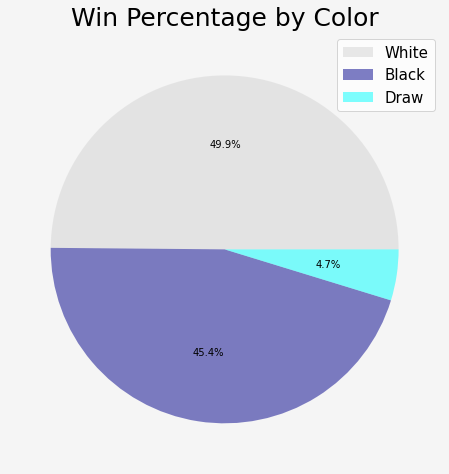

In [116]:
# Piechart showing proportion of results by color 
fig, ax = plt.subplots(figsize = (12,8))
y = df['winner'].value_counts()
mylabels = 'White', 'Black', 'Draw'
# Add % label, set colors for slices 
plt.pie(y, autopct='%1.1f%%', colors = ['lightgrey', 'darkblue', 'cyan'], wedgeprops={'alpha':0.5})
plt.title('Win Percentage by Color',fontsize=25)
plt.legend(mylabels, fontsize=15)
# Change chart background
fig.set_facecolor('whitesmoke')
plt.show()


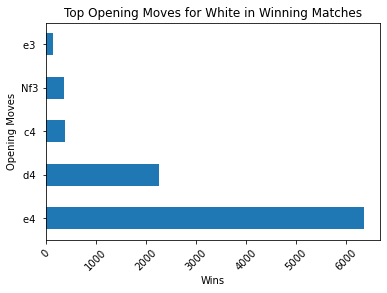

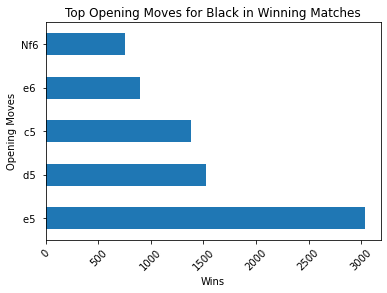

In [117]:
# Top 5 opening moves for white in winning matches
df["opening_move_white"]=df["moves"].str.slice(0,3)
white=df[df["winner"]=="White"].opening_move_white.value_counts().nlargest(5)

# Barchart of top 5 of white opening moves in winning matches
white.plot(kind="barh")
# Rotate x-labels 30 degrees, text aligned horizontally
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Top Opening Moves for White in Winning Matches")
plt.xlabel("Wins")
plt.ylabel("Opening Moves")
plt.show()

# Top 5 opening moves for black in winning matches
df["opening_move_black"]=df["moves"].str.slice(3,6)
black=df[df["winner"]=="Black"].opening_move_black.value_counts().nlargest(5)

# Barchart of top 5 black opening moves in winning matches
black.plot(kind="barh")
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Top Opening Moves for Black in Winning Matches")
plt.xlabel("Wins")
plt.ylabel("Opening Moves")
plt.show()


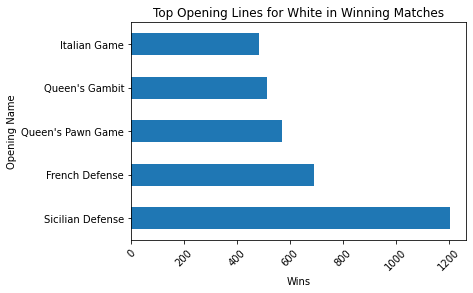

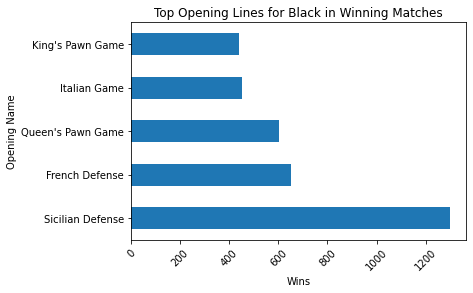

In [118]:
# Top 5 opening lines for white in winning matches
df["opening_sn_white"]=df["opening_shortname"]
white_lines=df[df["winner"]=="White"].opening_sn_white.value_counts().nlargest(5)

# Barchart white winningest opening lines
white_lines.plot(kind="barh")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Top Opening Lines for White in Winning Matches")
plt.xlabel("Wins")
plt.ylabel("Opening Name")
plt.show()

# Top 5 opening lines for black in winning matches 
df["opening_sn_white"]=df["opening_shortname"]
black_lines=df[df["winner"]=="Black"].opening_sn_white.value_counts().nlargest(5)

# Barchart black winningest opening lines
black_lines.plot(kind="barh")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Top Opening Lines for Black in Winning Matches")
plt.xlabel("Wins")
plt.ylabel("Opening Name")
plt.show()

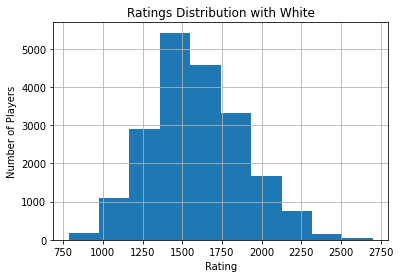

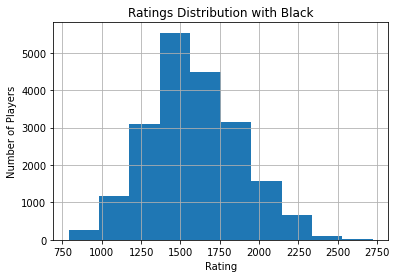

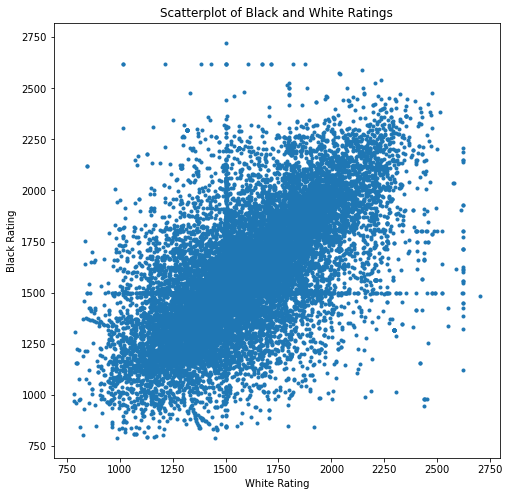


The correlation between white and black ratings is: 
 [[1.         0.63417078]
 [0.63417078 1.        ]]


In [121]:
# Histogram of ratings with white and black pieces 

# White 
df.hist('white_rating', bins=10)
plt.title("Ratings Distribution with White")
plt.xlabel("Rating")
plt.ylabel("Number of Players")
plt.show()

# Black 
df.hist('black_rating', bins=10)
plt.title("Ratings Distribution with Black")
plt.xlabel("Rating")
plt.ylabel("Number of Players")
plt.show()

# Scatterplot of white and black ratings 
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x = df['white_rating'], y = df['black_rating'], marker = ".")
plt.xlabel("White Rating")
plt.ylabel("Black Rating")
plt.title("Scatterplot of Black and White Ratings")
plt.show()

# Correlation bewteen ratings for black and white pieces 
p = df['white_rating']
q = df['black_rating']
correlation = np.corrcoef(p, q)
print("\nThe correlation between white and black ratings is: \n", correlation)

In [122]:
# Finding games with large variance in ratings between players 
df['rating_gap_white'] = True
df['rating_gap_black'] = True 

# Create new columns for games with more than 2 standard deviations (291 for both black and white ratings) between player ratings
df['rating_gap_white'] = np.where((df['white_rating'] - df['black_rating']) > 291, df['rating_gap_white'], np.nan)
df['rating_gap_black'] = np.where((df['black_rating'] - df['white_rating']) > 291, df['rating_gap_black'], np.nan)

# New dataframe with only games with ratings variance in favor of white
rating_gap_white_df= df.loc[df['rating_gap_white']==True] 
print(rating_gap_white_df[['white_id', 'white_rating', 'black_rating']])

# New dataframe with only games with ratings variance in favor of black
rating_gap_black_df= df.loc[df['rating_gap_black']==True]
print(rating_gap_black_df[['black_id', 'black_rating', 'white_rating']])

               white_id  white_rating  black_rating
game_id                                            
1              bourgris          1500          1191
20                g-ios          1500          1094
23           storm28rus          1500          1094
27         gmcarlsen403          1825          1079
31       biyanivedant01          1358          1036
...                 ...           ...           ...
19940       spiteknight          1653          1222
20001              rb52          1989          1653
20040          oddskill          1550          1250
20043      kevineclmans          1759          1265
20054           belcolt          1691          1220

[2019 rows x 3 columns]
                black_id  black_rating  white_rating
game_id                                             
8               soultego          2108          1413
12             subham777          1867          1381
13         roman12342005          1936          1381
21                lex_v1          

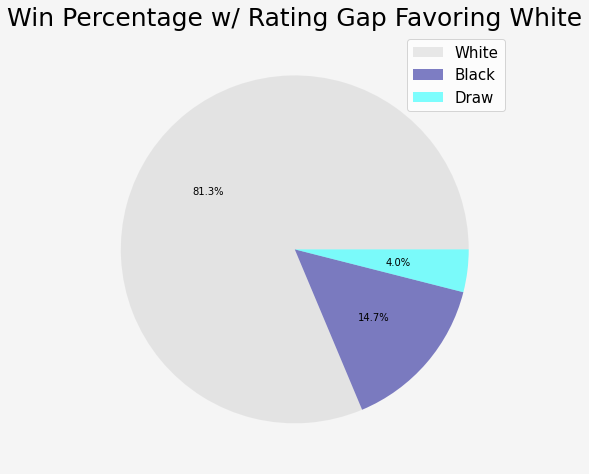

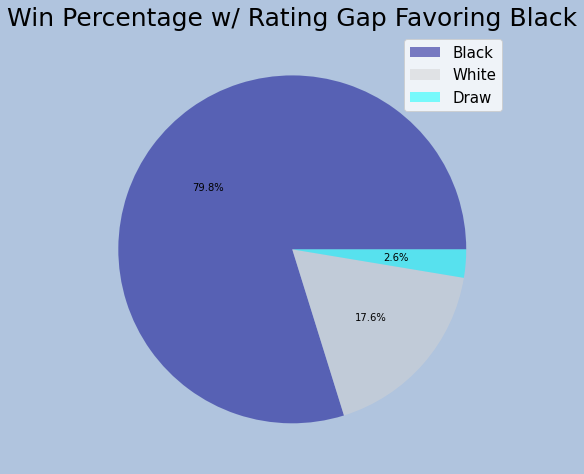

In [123]:
# Piechart showing proportion of results when rating gap favoring white  
fig, ax = plt.subplots(figsize = (12,8))
y = rating_gap_white_df['winner'].value_counts()
mylabels = 'White', 'Black', 'Draw'
plt.pie(y, autopct='%1.1f%%', colors = ['lightgrey', 'darkblue', 'cyan'], wedgeprops={'alpha':0.5})
plt.title('Win Percentage w/ Rating Gap Favoring White',fontsize=25)
plt.legend(mylabels, fontsize=15)
fig.set_facecolor('whitesmoke')
plt.show()

# Piechart showing proportion of results when rating gap favoring black  
fig, ax = plt.subplots(figsize = (12,8))
y = rating_gap_black_df['winner'].value_counts()
mylabels = 'Black', 'White', 'Draw' 
plt.pie(y, autopct='%1.1f%%', colors = ['darkblue', 'lightgrey', 'cyan'], wedgeprops={'alpha':0.5})
plt.title('Win Percentage w/ Rating Gap Favoring Black',fontsize=25)
plt.legend(mylabels, fontsize=15)
fig.set_facecolor('lightsteelblue')
plt.show()
